In [399]:
# Probability Amplitude Swapping Implementation
# Date Dec 20, 2023
# Code Author Tom Mai

In [400]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Statevector

In [401]:
# Count number of bits of a number
def numBits(num):
    count = 0
    while num:
        count += 1
        num >>= 1
    return count

In [402]:
# Find the maximum lenght of bitstring
def maxNumBits(x, y):
    return max(numBits(x), numBits(y))

In [403]:
# Find the first different bit between x and y (x != y)
def diffIndx(x, y) :
    # find max bits
    maxBitCount = maxNumBits(x, y)
    
    #find first left most different bit
    for i in range(maxBitCount-1, -1, -1):
        if (x & (1 << i)) ^ (y & (1 << i)) != 0:
            return maxBitCount - i - 1
    
    return -1


In [404]:
# Check if there is jth bit from the right most of bitstring
def getBit(num, i):
    return num & (1<<i)

In [405]:
# Flip the ith bit from the right most of bitstring
def flipBit(num,j):
    return num ^ (1 << j)
    

In [406]:
# Adding leading zeros to a bistring to fit with n number of bits
def extendBitString(stringX, numBit):
    return stringX.zfill(numBit)

In [407]:
def swappingAmplitude(x, y):
    # The number of qubit is the length of the longest bitstring among 2 numbers
    n = maxNumBits(x, y)
    bitStringX = "{0:b}".format(x)
    bitStringY = "{0:b}".format(y)

    # Matching the bit string length
    if numBits(x) > numBits(y):
        bitStringY = extendBitString(bitStringY, n)
    elif numBits(x) < numBits(y):
        bitStringX = extendBitString(bitStringX, n)
    
    print('X in: '+bitStringX)
    print('Y in: '+bitStringY)

    # Create first quantum state
    sv1 = Statevector.from_label(bitStringX[::-1])

    # Create second quantum state
    sv2 = Statevector.from_label(bitStringY[::-1])
    
    # Create quantum circuit acting on a quantum register of n qubits
    circ = QuantumCircuit(n)
    
    # Find the position of the first different bit between 2 bitstrings from left to right
    i = diffIndx(x, y)

    if i != -1:
        # Create an array of different bits between x and y after the ith bit
        diffBits = []

        # Create an array of 0 bit after the ith bit after apply CNOT gate
        zeroBits = []

        # Step 1 applying CNOT gate to every different bits between 2 bitstrings from i to n
        for j in range(i+1, n):
        #     If jth bit of x and y is different
        #     then apply CNOT gate from i to j
            if getBit(x, n-j-1) != getBit(y, n-j-1):
        #         Adding j to array of different bits
                diffBits.append(j)
        #         Add CNOT gate to the circuit
                circ.cx(i, j)
        #         Flip the bit conresponding to CNOT gate in bitstring of x and y the make use in the next operations
                if getBit(x, n-i-1) != 0:
                    x = flipBit(x, n-j-1)
                if getBit(y, n-i-1) != 0:
                    y = flipBit(y, n-j-1)

        # Step 2.1 applying NOT gate to bits from i to n that different from i bit
        for w in range(i+1, n):
        #     If there is not bit in the wth position of bitstrings then applying NOT gate to flip the bit 
            if getBit(x, n-w-1) == 0:
        #         Adding w to array of 0 bits after ith bit
                zeroBits.append(w)
        #         Adding NOT gate at wth bit
                circ.x(w)
        #         Flip the bit conresponding to NOT gate in bitstring of x and y the make use in the next operations
                x = flipBit(x, n-w-1)
                y = flipBit(y, n-w-1)

        
        # Create list of index in control bits
        controls = []
        for g in range(n):
            if g != i:
                controls.append(g)
        
        # Step 2.2 applying MCX gate from control bits to i
        circ.mcx(controls, i)

        # Flip the ith bit if control bits is 1
        if (getBit(x, i+1) != 0):
            x = flipBit(x, n-i-1)
            y = flipBit(y, n-i-1)

        # Step 3.1 repeating Step 2.1
        for l in zeroBits:
            circ.x(l)
        # Flip the bit conresponding to NOT gate in bitstring of x and y the make use in the next operations
            x = flipBit(x, n-l-1)
            y = flipBit(y, n-l-1)

        # Step 3.2 repeating Step 1
        for g in diffBits:
            circ.cx(i, g)
            if getBit(x, n-i-1) != 0:
                x = flipBit(x, n-g-1)
            if getBit(y, n-i-1) != 0:
                y = flipBit(y, n-g-1)

        # Applying the circuit to the first quantum state
        sv1 = sv1.evolve(circ)

        # Applying the circuit to the second quantum state
        sv2 = sv2.evolve(circ)
        
    return circ, sv1, sv2

In [408]:
circ, sv1, sv2 = swappingAmplitude(5500, 7450)

X in: 1010101111100
Y in: 1110100011010


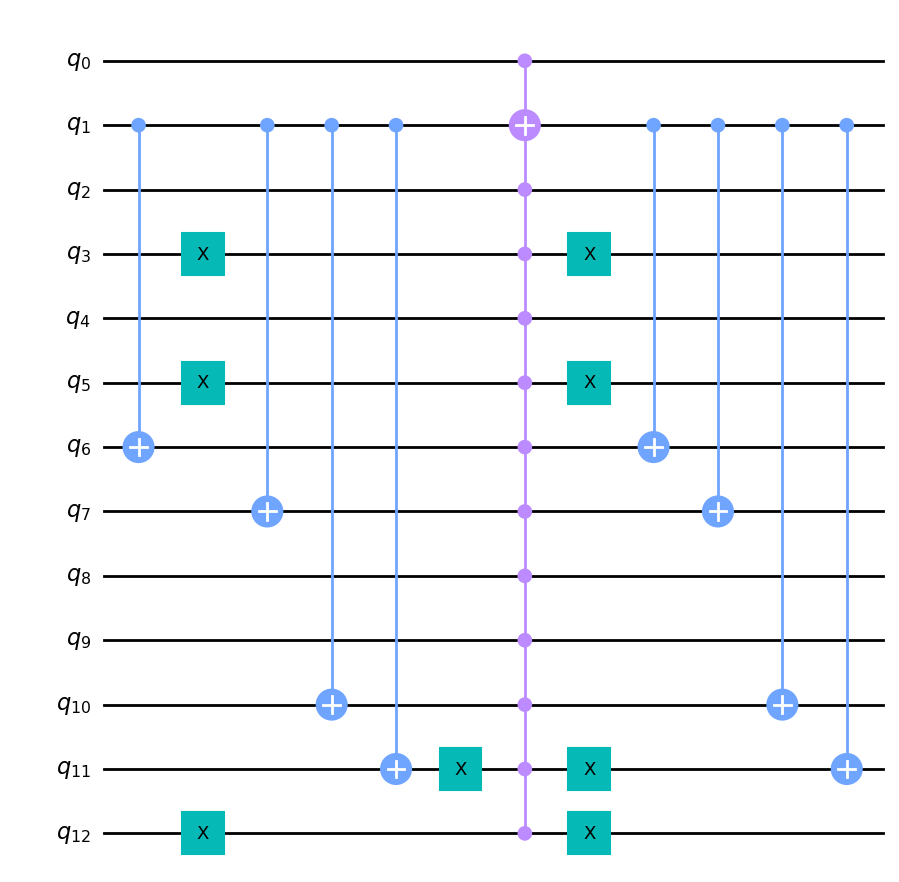

In [409]:
circ.draw('mpl')

In [410]:
print("X Out:")
sv1.draw('latex')

X Out:


<IPython.core.display.Latex object>

In [411]:
print("Y Out:")
sv2.draw('latex')

Y Out:


<IPython.core.display.Latex object>